In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [3]:
math = pd.read_csv('C:/Users/blain/Desktop/DSC680/student_math_clean.csv')
port = pd.read_csv('C:/Users/blain/Desktop/DSC680/student_portuguese_clean.csv')
pd.set_option('display.max_columns', None)

In [4]:
math

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,course,mother,15 to 30 min.,2 to 5 hours,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,course,father,<15 min.,2 to 5 hours,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,other,mother,<15 min.,2 to 5 hours,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,services,home,mother,<15 min.,5 to 10 hours,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,other,home,father,<15 min.,2 to 5 hours,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,services,course,other,<15 min.,2 to 5 hours,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,services,course,mother,15 to 30 min.,<2 hours,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,other,course,other,<15 min.,<2 hours,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,other,course,mother,30 min. to 1 hour,<2 hours,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [5]:
port

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,course,mother,15 to 30 min.,2 to 5 hours,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,course,father,<15 min.,2 to 5 hours,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,other,mother,<15 min.,2 to 5 hours,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,services,home,mother,<15 min.,5 to 10 hours,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,other,home,father,<15 min.,2 to 5 hours,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,MS,F,19,Rural,Greater than 3,Living together,5th to 9th grade,secondary education,services,other,course,mother,<15 min.,5 to 10 hours,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,646,MS,F,18,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),teacher,services,course,mother,<15 min.,2 to 5 hours,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,647,MS,F,18,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,other,course,mother,15 to 30 min.,2 to 5 hours,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,648,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,services,course,mother,15 to 30 min.,<2 hours,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


Drop student id, grade 1, and grade 2. Student id is just an index, and the focus will be on final grade for this analysis.

In [6]:
math = math.drop(['student_id','grade_1','grade_2'], axis=1)
port = port.drop(['student_id','grade_1','grade_2'], axis=1)

Create keys to merge the math and portuguese dataframes. Then check the key column for any duplicates.

In [7]:
math['key'] = math['school'].astype(str) + math['sex'].astype(str) + math['age'].astype(str) + math['address_type'].astype(str) + math['family_size'].astype(str) + math['parent_status'].astype(str) + math['mother_education'].astype(str) + math['father_education'].astype(str) + math['mother_job'].astype(str) + math['father_job'].astype(str) + math['school_choice_reason'].astype(str) + math['guardian'].astype(str) + math['travel_time'].astype(str) + math['study_time'].astype(str) + math['class_failures'].astype(str) + math['school_support'].astype(str) + math['family_support'].astype(str) + math['activities'].astype(str) + math['nursery_school'].astype(str) + math['higher_ed'].astype(str) + math['internet_access'].astype(str) + math['romantic_relationship'].astype(str) + math['family_relationship'].astype(str) + math['free_time'].astype(str) + math['social'].astype(str) + math['weekday_alcohol'].astype(str) + math['weekend_alcohol'].astype(str) + math['health'].astype(str)
len(math['key'])-len(math['key'].drop_duplicates())

0

In [8]:
port['key'] = port['school'].astype(str) + port['sex'].astype(str) + port['age'].astype(str) + port['address_type'].astype(str) + port['family_size'].astype(str) + port['parent_status'].astype(str) + port['mother_education'].astype(str) + port['father_education'].astype(str) + port['mother_job'].astype(str) + port['father_job'].astype(str) + port['school_choice_reason'].astype(str) + port['guardian'].astype(str) + port['travel_time'].astype(str) + port['study_time'].astype(str) + port['class_failures'].astype(str) + port['school_support'].astype(str) + port['family_support'].astype(str) + port['activities'].astype(str) + port['nursery_school'].astype(str) + port['higher_ed'].astype(str) + port['internet_access'].astype(str) + port['romantic_relationship'].astype(str) + port['family_relationship'].astype(str) + port['free_time'].astype(str) + port['social'].astype(str) + port['weekday_alcohol'].astype(str) + port['weekend_alcohol'].astype(str) + port['health'].astype(str)
len(port['key'])-len(port['key'].drop_duplicates())

2

Found 2 duplicates in portuguese. Compare against the math dataframe to check if those same students are present. If not, move forward with inner merge, as the duplicated students will not be merging.

In [9]:
port[port['key'].duplicated()]

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,final_grade,key
443,MS,M,15,Rural,Less than or equal to 3,Living together,higher education,primary education (4th grade),health,services,reputation,father,<15 min.,2 to 5 hours,0,no,yes,no,yes,yes,yes,yes,no,5,3,4,1,2,2,7,8,MSM15RuralLess than or equal to 3Living togeth...
454,MS,F,16,Urban,Greater than 3,Living together,primary education (4th grade),5th to 9th grade,other,services,course,mother,<15 min.,5 to 10 hours,1,no,yes,no,no,yes,yes,no,no,1,3,2,1,2,4,3,8,MSF16UrbanGreater than 3Living togetherprimary...


In [10]:
math.loc[math['key'] == port.iloc[443]['key']]

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,final_grade,key


In [11]:
math.loc[math['key'] == port.iloc[454]['key']]

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,final_grade,key


In [12]:
both = pd.merge(math, port[['key','extra_paid_classes','absences','final_grade']], on='key', how='inner')
both

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes_x,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences_x,final_grade_x,key,extra_paid_classes_y,absences_y,final_grade_y
0,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,course,mother,15 to 30 min.,2 to 5 hours,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6,GPF18UrbanGreater than 3Aparthigher educationh...,no,4,11
1,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,course,father,<15 min.,2 to 5 hours,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6,GPF17UrbanGreater than 3Living togetherprimary...,no,2,11
2,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,services,home,mother,<15 min.,5 to 10 hours,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,GPF15UrbanGreater than 3Living togetherhigher ...,no,0,14
3,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,other,home,father,<15 min.,2 to 5 hours,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10,GPF16UrbanGreater than 3Living togetherseconda...,no,0,13
4,GP,M,16,Urban,Less than or equal to 3,Living together,higher education,secondary education,services,other,reputation,mother,<15 min.,2 to 5 hours,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,GPM16UrbanLess than or equal to 3Living togeth...,no,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,MS,F,18,Rural,Greater than 3,Living together,higher education,higher education,teacher,at_home,reputation,mother,30 min. to 1 hour,<2 hours,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,MSF18RuralGreater than 3Living togetherhigher ...,no,4,10
316,MS,F,19,Rural,Greater than 3,Living together,5th to 9th grade,secondary education,services,other,course,mother,<15 min.,5 to 10 hours,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,0,0,MSF19RuralGreater than 3Living together5th to ...,no,4,10
317,MS,F,18,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),teacher,services,course,mother,<15 min.,2 to 5 hours,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,8,MSF18UrbanLess than or equal to 3Living togeth...,no,4,16
318,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,services,course,mother,15 to 30 min.,<2 hours,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16,MSM17UrbanLess than or equal to 3Living togeth...,no,6,10


Create a single target variable for the merged dataframe: an average of the math and portuguese final grades.

In [13]:
both['final_grade_avg'] = (both['final_grade_x'] + both['final_grade_y'])/2

Drop key columns from all dataframes, and the individual class final grades from the merged dataframe.

In [14]:
math = math.drop(['key'], axis=1)
port = port.drop(['key'], axis=1)
both = both.drop(['key','final_grade_x','final_grade_y'], axis=1)

In [15]:
math_x = math.drop(['final_grade'], axis=1)
math_y = math[['final_grade']]
port_x = port.drop(['final_grade'], axis=1)
port_y = port[['final_grade']]
both_x = both.drop(['final_grade_avg'], axis=1)
both_y = both[['final_grade_avg']]

In [16]:
math_x_train, math_x_test, math_y_train, math_y_test = train_test_split(math_x, math_y, test_size=0.33)
port_x_train, port_x_test, port_y_train, port_y_test = train_test_split(port_x, port_y, test_size=0.33)
both_x_train, both_x_test, both_y_train, both_y_test = train_test_split(both_x, both_y, test_size=0.33)

***Model the data from the math dataframe.***

Split the columns into categorical and continuous. Then send the categorical data through one-hot encoding and the continuous variables through a min-max scaler.

In [17]:
math_categorical = ['school','sex','address_type','family_size','parent_status','mother_education','father_education','mother_job','father_job','school_choice_reason','guardian','travel_time','study_time','school_support','family_support','extra_paid_classes','activities','nursery_school','higher_ed','internet_access','romantic_relationship','family_relationship','free_time','social','weekday_alcohol','weekend_alcohol','health']
math_continuous = math_x_train.drop(columns = math_categorical).columns

In [18]:
math_ct = ColumnTransformer([('ohe', OneHotEncoder(sparse=False), math_categorical)], remainder=MinMaxScaler())
math_x_train_trans = math_ct.fit_transform(math_x_train)

Use LASSO to select the features that correlate most to the final grade achieved.

In [19]:
math_feature_sel_model = SelectFromModel(Lasso(alpha=0.05))
math_feature_sel_model.fit(math_x_train_trans, math_y_train)
math_feature_sel_model.get_support()

array([ True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False])

In [20]:
all_features = np.concatenate([math_ct.named_transformers_.ohe.get_feature_names_out(math_categorical), math_continuous])
all_features[math_feature_sel_model.get_support()]

array(['school_GP', 'sex_F', 'address_type_Rural',
       'family_size_Greater than 3', 'mother_education_5th to 9th grade',
       'mother_education_higher education',
       'mother_education_primary education (4th grade)',
       'father_education_higher education',
       'father_education_primary education (4th grade)',
       'mother_job_other', 'mother_job_services', 'father_job_at_home',
       'father_job_other', 'father_job_services', 'father_job_teacher',
       'school_choice_reason_reputation', 'travel_time_<15 min.',
       'study_time_5 to 10 hours', 'study_time_<2 hours',
       'school_support_no', 'activities_no', 'romantic_relationship_no',
       'free_time_2', 'free_time_3', 'free_time_5', 'social_2',
       'social_3', 'social_4', 'weekday_alcohol_1', 'weekday_alcohol_2',
       'weekend_alcohol_2', 'weekend_alcohol_4', 'weekend_alcohol_5',
       'health_1', 'health_2', 'age', 'class_failures'], dtype=object)

In [21]:
math_x_train_trans_sel = math_x_train_trans[:,math_feature_sel_model.get_support()]

Create a linear regression model and fit it to the training data.

In [22]:
math_model = LinearRegression()
math_model.fit(math_x_train_trans_sel, math_y_train)

LinearRegression()

Fit the test features to the column transformer. Then use only the selected features of the column transformer to predict the final grades with the linear regression model.

In [23]:
math_x_test_trans = math_ct.transform(math_x_test)

In [24]:
math_x_test_trans_sel = math_x_test_trans[:,math_feature_sel_model.get_support()]

In [25]:
metrics.mean_squared_error(math_y_test, math_model.predict(math_x_test_trans_sel))

22.201614361013547

In [26]:
metrics.r2_score(math_y_test, math_model.predict(math_x_test_trans_sel))

-0.07085573607431694

***Model the data from the portuguese dataframe.***

Split the columns into categorical and continuous. Then send the categorical data through one-hot encoding and the continuous variables through a min-max scaler.

In [27]:
port_categorical = ['school','sex','address_type','family_size','parent_status','mother_education','father_education','mother_job','father_job','school_choice_reason','guardian','travel_time','study_time','school_support','family_support','extra_paid_classes','activities','nursery_school','higher_ed','internet_access','romantic_relationship','family_relationship','free_time','social','weekday_alcohol','weekend_alcohol','health']
port_continuous = port_x_train.drop(columns = port_categorical).columns

In [28]:
port_ct = ColumnTransformer([('ohe', OneHotEncoder(sparse=False), port_categorical)], remainder=MinMaxScaler())
port_x_train_trans = port_ct.fit_transform(port_x_train)

Use LASSO to select the features that correlate most to the final grade achieved.

In [29]:
port_feature_sel_model = SelectFromModel(Lasso(alpha=0.05))
port_feature_sel_model.fit(port_x_train_trans, port_y_train)
port_feature_sel_model.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False])

In [30]:
port_features = np.concatenate([port_ct.named_transformers_.ohe.get_feature_names_out(port_categorical), port_continuous])
port_features[port_feature_sel_model.get_support()]

array(['school_GP', 'sex_F', 'mother_education_higher education',
       'mother_education_primary education (4th grade)',
       'father_education_primary education (4th grade)',
       'mother_job_at_home', 'father_job_services',
       'school_choice_reason_reputation', 'guardian_father',
       'study_time_5 to 10 hours', 'school_support_no', 'activities_no',
       'higher_ed_no', 'romantic_relationship_no',
       'family_relationship_4', 'free_time_2', 'free_time_3',
       'free_time_5', 'social_1', 'social_2', 'weekday_alcohol_1',
       'weekend_alcohol_4', 'health_5', 'class_failures'], dtype=object)

In [31]:
port_x_train_trans_sel = port_x_train_trans[:,port_feature_sel_model.get_support()]

Create a linear regression model and fit it to the training data.

In [32]:
port_model = LinearRegression()
port_model.fit(port_x_train_trans_sel, port_y_train)

LinearRegression()

Fit the test features to the column transformer. Then use only the selected features of the column transformer to predict the final grades with the linear regression model.

In [33]:
port_x_test_trans = port_ct.transform(port_x_test)

In [34]:
port_x_test_trans_sel = port_x_test_trans[:,port_feature_sel_model.get_support()]

In [35]:
metrics.mean_squared_error(port_y_test, port_model.predict(port_x_test_trans_sel))

8.746870095922006

In [36]:
metrics.r2_score(port_y_test, port_model.predict(port_x_test_trans_sel))

0.2675898925379503

***Model the data from the portuguese dataframe.***

Split the columns into categorical and continuous. Then send the categorical data through one-hot encoding and the continuous variables through a min-max scaler.

In [37]:
both_categorical = ['school','sex','address_type','family_size','parent_status','mother_education','father_education','mother_job','father_job','school_choice_reason','guardian','travel_time','study_time','school_support','family_support','extra_paid_classes_x','activities','nursery_school','higher_ed','internet_access','romantic_relationship','family_relationship','free_time','social','weekday_alcohol','weekend_alcohol','health', 'extra_paid_classes_y']
both_continuous = both_x_train.drop(columns = both_categorical).columns

In [38]:
both_ct = ColumnTransformer([('ohe', OneHotEncoder(sparse=False), both_categorical)], remainder=MinMaxScaler())
both_x_train_trans = both_ct.fit_transform(both_x_train)

Use LASSO to select the features that correlate most to the final grade achieved.

In [39]:
both_feature_sel_model = SelectFromModel(Lasso(alpha=0.05))
both_feature_sel_model.fit(both_x_train_trans, both_y_train)
both_feature_sel_model.get_support()

array([ True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False, False])

In [40]:
both_features = np.concatenate([both_ct.named_transformers_.ohe.get_feature_names_out(both_categorical), both_continuous])
both_features[both_feature_sel_model.get_support()]

array(['school_GP', 'sex_F', 'address_type_Rural',
       'family_size_Greater than 3', 'mother_education_5th to 9th grade',
       'mother_education_higher education',
       'mother_education_primary education (4th grade)',
       'father_education_higher education', 'mother_job_other',
       'father_job_teacher', 'school_choice_reason_reputation',
       'guardian_father', 'study_time_5 to 10 hours',
       'study_time_<2 hours', 'school_support_no',
       'extra_paid_classes_x_no', 'romantic_relationship_no',
       'free_time_2', 'free_time_4', 'social_2', 'social_3', 'social_4',
       'social_5', 'weekday_alcohol_4', 'weekend_alcohol_1', 'health_1',
       'health_3', 'extra_paid_classes_y_no', 'class_failures'],
      dtype=object)

In [41]:
both_x_train_trans_sel = both_x_train_trans[:,both_feature_sel_model.get_support()]

Create a linear regression model and fit it to the training data.

In [42]:
both_model = LinearRegression()
both_model.fit(both_x_train_trans_sel, both_y_train)

LinearRegression()

Fit the test features to the column transformer. Then use only the selected features of the column transformer to predict the final grades with the linear regression model.

In [43]:
both_x_test_trans = both_ct.transform(both_x_test)

In [44]:
both_x_test_trans_sel = both_x_test_trans[:,both_feature_sel_model.get_support()]

In [45]:
metrics.mean_squared_error(both_y_test, both_model.predict(both_x_test_trans_sel))

10.605224416453687

In [46]:
metrics.r2_score(both_y_test, both_model.predict(both_x_test_trans_sel))

-0.10790881386159645

<function matplotlib.pyplot.show(close=None, block=None)>

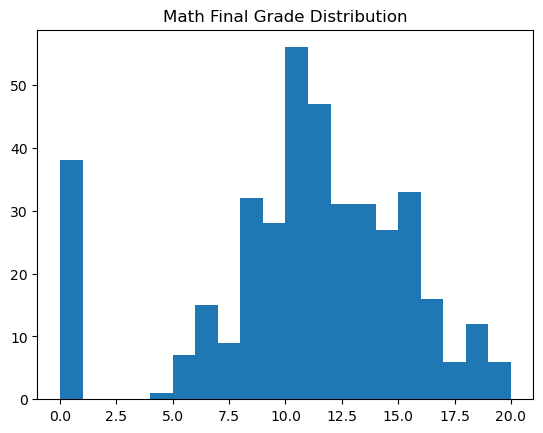

In [57]:
plt.hist(math['final_grade'], bins=20)
plt.title('Math Final Grade Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

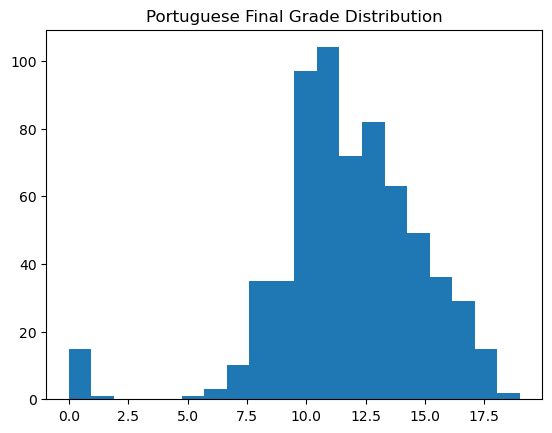

In [58]:
plt.hist(port['final_grade'], bins=20)
plt.title('Portuguese Final Grade Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

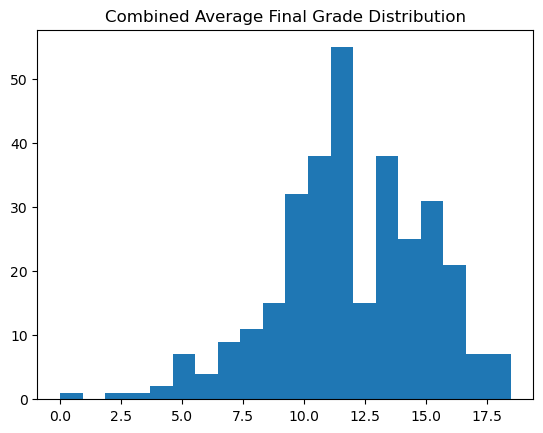

In [59]:
plt.hist(both['final_grade_avg'], bins=20)
plt.title('Combined Average Final Grade Distribution')
plt.show